



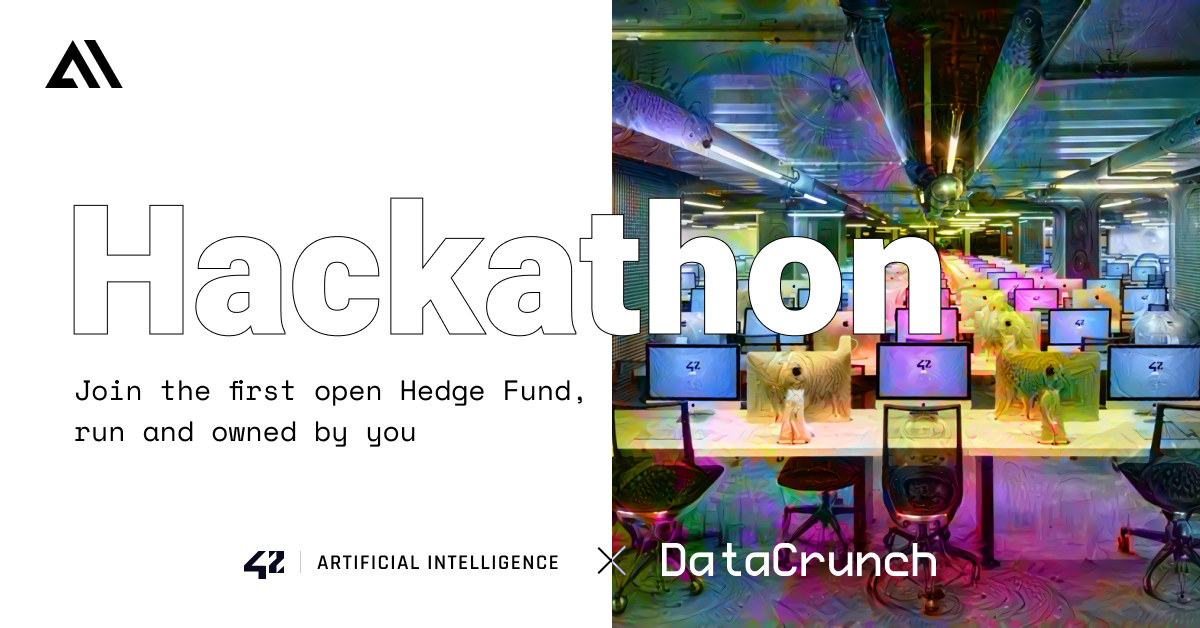

# QuickStart

##Basic step and workflow:

0 - Using this notebook

1 - Download data

2 - Explore data

3 - Choose and train a model

4 - Scoring

5 - Make prediction

6 - Submit

---

## 0 - Using this notebook 

To execute the cell press `shift+enter`. 

Follow the steps and login with your Google account.

In [1]:
# Lib & Dependencies
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import requests
from scipy import stats

# 1 - Download data

We will provide you with two dataset

- Training_data will be use to train your model.
- Hackathon_data will be use to make your prediciton.


There is three target you need to provide prediction on: target_r, target_g, target_b.




In [21]:
# Data Download (may take a few minutes depending on your network)
train_datalink_X = 'https://tournament.datacrunch.com/data/_X_train.csv'  # Be sure to remove example to get the real tournament data
train_datalink_y = 'https://tournament.datacrunch.com/data/_y_train.csv' # Be sure to remove example to get the real tournament data
hackathon_data_link = 'https://tournament.datacrunch.com/data/_X_test.csv' # Be sure to remove example to get the real tournament data

# Data for training
train_data = pd.read_csv(train_datalink_X)
# Data for which you will submit your prediction
test_data = pd.read_csv(hackathon_data_link)
# Targets to be predicted
train_targets = pd.read_csv(train_datalink_y)

# If you don't want to look at the problem as a time serie
train_data.drop(['Unnamed: 0', 'id', 'Moons'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0', 'id', 'Moons'], axis=1, inplace=True)

In [23]:
print(train_data.columns)
print(train_targets.columns)

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15',
       'Feature_16', 'Feature_17', 'Feature_18'],
      dtype='object')
Index(['Unnamed: 0', 'target_r', 'target_g', 'target_b'], dtype='object')


In [26]:
display(train_data.head())
display(train_targets.head())

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0       0.00       1.00       0.25       0.75       0.00       0.25   
1        NaN        NaN       0.25        NaN        NaN        NaN   
2       0.75       0.75       0.00       0.25       0.25       0.00   
3       0.75       0.50       0.25       0.25       0.75       0.25   
4       0.00       1.00       0.00       1.00       0.00       1.00   

   Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0       0.50       0.25       0.25        0.25        0.25         1.0   
1       0.50        NaN        NaN         NaN         NaN         NaN   
2       0.00       0.00       0.00        0.00        0.00         0.0   
3       0.25       0.50       0.50        0.50        0.25         0.5   
4       0.00       0.25       0.25        0.25        1.00         1.0   

   Feature_13  Feature_14  Feature_15  Feature_16  Feature_17  Feature_18  
0         0.0         0.0         0.0         0.0        0.00        0.75  
1         NaN         NaN         NaN         1.0         NaN        1.00  
2         0.0         0.0         0.0         0.0        0.75        1.00  
3         0.5         0.0         0.0         0.0        0.75        0.75  
4         0.0         0.0         0.0         0.0        0.00        1.00

Unnamed: 0  target_r  target_g  target_b
0           0      1.00      0.75      0.00
1           1      1.00      1.00      0.75
2           2      0.25      1.00      1.00
3           3      0.00      0.75      0.50
4           4      0.25      0.50      0.00

# 2 - Explore Data

Data processing is one of the most important part. Observe your data and prepare carefully what you will give to your model for training.

In [29]:
display(train_data.describe())
display(train_targets.describe())

Feature_1     Feature_2     Feature_3     Feature_4     Feature_5  \
count  86164.000000  84951.000000  65443.000000  83318.000000  84482.000000   
mean       0.499985      0.499985      0.429618      0.499997      0.499991   
std        0.353563      0.353559      0.339704      0.353565      0.353563   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.250000      0.250000      0.000000      0.250000      0.250000   
50%        0.500000      0.500000      0.500000      0.500000      0.500000   
75%        0.750000      0.750000      0.750000      0.750000      0.750000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Feature_6     Feature_7     Feature_8     Feature_9    Feature_10  \
count  83830.000000  59550.000000  85390.000000  85388.000000  85390.000000   
mean       0.499988      0.497897      0.499991      0.499988      0.499991   
std        0.353555      0.353463      0.353554      0.353560      0.353554   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.250000      0.250000      0.250000      0.250000      0.250000   
50%        0.500000      0.500000      0.500000      0.500000      0.500000   
75%        0.750000      0.750000      0.750000      0.750000      0.750000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         Feature_11    Feature_12    Feature_13    Feature_14    Feature_15  \
count  85348.000000  82495.000000  59569.000000  83328.000000  83323.000000   
mean       0.499985      0.499988      0.499983      0.499994      0.499985   
std        0.353552      0.353560      0.353550      0.353558      0.353552   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.250000      0.250000      0.250000      0.250000      0.250000   
50%        0.500000      0.500000      0.500000      0.500000      0.500000   
75%        0.750000      0.750000      0.750000      0.750000      0.750000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         Feature_16    Feature_17    Feature_18  
count  88547.000000  85486.000000  91312.000000  
mean       0.500000      0.499991      0.492331  
std        0.353559      0.353559      0.355015  
min        0.000000      0.000000      0.000000  
25%        0.250000      0.250000      0.250000  
50%        0.500000      0.500000      0.500000  
75%        0.750000      0.750000      0.750000  
max        1.000000      1.000000      1.000000

Unnamed: 0      target_r      target_g      target_b
count  91598.000000  91598.000000  91598.000000  91598.000000
mean   45798.500000      0.500000      0.500000      0.500000
std    26442.209316      0.353557      0.353557      0.353557
min        0.000000      0.000000      0.000000      0.000000
25%    22899.250000      0.250000      0.250000      0.250000
50%    45798.500000      0.500000      0.500000      0.500000
75%    68697.750000      0.750000      0.750000      0.750000
max    91597.000000      1.000000      1.000000      1.000000

# 3 - Choose models

Crunch with originality!!! üë®üèª‚Äçüè≠

In [33]:
def xg_boost_hackathon(data, target):
    X, y = data, target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=5, learning_rate=0.01, n_estimators=200, n_jobs=-1, colsample_bytree=0.5)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scorer(y_test, pred)

    return model

# 4 - How we will compute your mean score

In [34]:
def scorer(y_test, y_pred):
    score = (stats.spearmanr(y_test, y_pred))[0]
    print('Score as calculated for the leader board („Å£‡≤†‚Äø‡≤†)„Å£ {}'.format(score))

# Train your Models on targets

You can submit continious target if you want

In [35]:
# Making prediction for target r
model_target_r = xg_boost_hackathon(train_data, train_targets.target_r)
# Making prediction for target g
model_target_g = xg_boost_hackathon(train_data, train_targets.target_g)
# Making prediction for target b
model_target_b = xg_boost_hackathon(train_data, train_targets.target_b)

Score as calculated for the leader board („Å£‡≤†‚Äø‡≤†)„Å£ 0.06532987928122914
Score as calculated for the leader board („Å£‡≤†‚Äø‡≤†)„Å£ -0.0144972302077779
Score as calculated for the leader board („Å£‡≤†‚Äø‡≤†)„Å£ 0.007706895143818765


# 5 - Make prediction on the 3 targets

When you feel like your model is accurate enough it's time to predict the target and submit your results.

Repeat the operation on the three targets, concatenate the answers and submit.

**WARNING** 1/ Keep the raw order identical.

**WARNING** 2/ Be sure that your columns are named target_r, target-g adn target_b.

**WARNING** 3/ Your prediction need to be between 0 and 1.

**WARNING** 4/ Don't submit constant values.

In [ ]:
prediction = pd.DataFrame()
prediction['target_r'] = model_target_r.predict(test_data)
prediction['target_g'] = model_target_g.predict(test_data)
prediction['target_b'] = model_target_b.predict(test_data)

# 6 - Submit predictions

Past <u>your</u> API key here. You received it by email upon subscription and can find it on your leaderboard.


In [ ]:
API_KEY = "" # <- HERE

r = requests.post("https://tournament.datacrunch.com/api/submission",
    files = {
        "file": ("x", prediction.to_csv().encode('ascii'))
    },
    data = {
        "apiKey": API_KEY
    },
)

if r.status_code == 200:
    print("Submission submitted :)")
elif r.status_code == 423:
    print("ERR: Submissions are close")
    print("You can only submit during rounds eg: Friday 7pm GMT+1 to Sunday midnight GMT+1.")
    print("Or the server is currently crunching the submitted files, please wait some time before retrying.")
elif r.status_code == 422:
    print("ERR: API Key is missing or empty")
    print("Did you forget to fill the API_KEY variable?")
elif r.status_code == 404:
    print("ERR: Unknown API Key")
    print("You should check that the provided API key is valid and is the same as the one you've received by email.")
elif r.status_code == 400:
    print("ERR: The file must not be empty")
    print("You have send a empty file.")
elif r.status_code == 401:
    print("ERR: Your email hasn't been verified")
    print("Please verify your email or contact a cruncher.")
elif r.status_code == 429:
    print("ERR: Too many submissions")
else:
    print("ERR: Server returned: " + str(r.status_code))
    print("Ouch! It seems that we were not expecting this kind of result from the server, if the probleme persist, contact a cruncher.")

# How to improve your prediction




sklearn Docs
https://scikit-learn.org/stable/index.html

Tuning Tuning the hyper-parameters of an estimator 
https://scikit-learn.org/stable/modules/grid_search.html

Cross Validation (in Python and R) 
https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

Possible ways to improve your prediction

1- Feature extraction and feature engineering; following methods are possible:

    princilpal component analysis (PCA)

    linear discriminant analysis (LDA)

    selecting best features (KBest)

    t-SNE method for feature engineering

    feature interactions using PolynomialFeatures

2- training multiple individual classifiers; these include:

    Keras neural networks

    Logistic regression

    Support vector machine

    Gaussian naive Bayes

    Random forrest classifier

    Extra trees classifier

    Gradient boost classifier

    AdaBoost classifier

    Bagging classifier

    Stochastic gradient descent

    K-Nearest neighbors

Grid search and cross validation are used with some of the classifiers in order to fine tune their hyperparameters. 

Pipelines are used for automating tasks when needed. 

Keras neural network can be easily reconfigured using different number of hidden layers and/or neurons per layer, along with different training algorithms.

3- aggregating individual classifiers using ensambling by soft voting, blending and stacking; possibilities include:

    blending with logistic regression

    blending with linear regression

    blending with Extremly randomised trees

    blending with Keras neural network classifier

    stacking with TensorFlow DNN classifier

    stacking with Extremly randomised trees

    stacking with Keras neural network classifier with Merged branches

    simple averageing of classifiers using different weights

In [ ]:
# Downloads data
from google.colab import files
with open("prediciton.csv", "wb") as f:
    f.write(prediction.to_csv().encode('ascii'))
files.download('prediciton.csv')

In [ ]:
from google.colab import files
import pickle

# Export model as pickle
pickle.dump(model_target_r, open("model_target_r.model", "wb"))
files.download('model_target_r.model')

In [ ]:
!pip freeze | grep "sklearn" 